In [1]:
!pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
movies = pd.read_csv("my_movies.csv")
movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


# Pre-Processing


In [ ]:
#As the data is not in transaction formation 
#We are using transaction Encoder

In [4]:
movies_data= pd.get_dummies(movies)
movies_data

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,V1_Gladiator,V1_Harry Potter1,V1_LOTR1,V1_Sixth Sense,V2_Harry Potter2,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
5,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


# Apriori Algorithm 

In [ ]:
#Using 10% support and 70% confidence

In [5]:
itemsets = apriori(movies_data, min_support= 0.1 , use_colnames= True)
itemsets 

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har..."
1393,0.1,"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har..."
1394,0.1,"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har..."
1395,0.1,"(V2_LOTR1, V1_Sixth Sense, V3_Harry Potter1, H..."


In [6]:
rules = association_rules(itemsets, metric= 'lift', min_threshold=0.7)
rules.sort_values("lift", ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V5_LOTR2, Sixth Sense, Green Mile, LOTR2)","(V3_Harry Potter1, Harry Potter1, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33437,"(V5_LOTR2, V4_Green Mile, LOTR2)","(V2_LOTR1, Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(V2_LOTR1, LOTR1, LOTR2)","(Harry Potter1, Sixth Sense, V4_Green Mile, V5...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(V2_LOTR1, V4_Green Mile, LOTR2)","(Harry Potter1, Sixth Sense, LOTR1, V5_LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33417,"(V2_LOTR1, LOTR1, V5_LOTR2)","(Harry Potter1, Sixth Sense, V4_Green Mile, LO...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
56,(Gladiator),(V4_Green Mile),0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
57,(V4_Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
214,"(Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
664,"(V1_Sixth Sense, Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000


In [7]:
rules[rules.lift>1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64247,(Green Mile),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64248,(LOTR2),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64249,(V5_LOTR2),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(LOTR1),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


Text(0, 0.5, 'confidence')

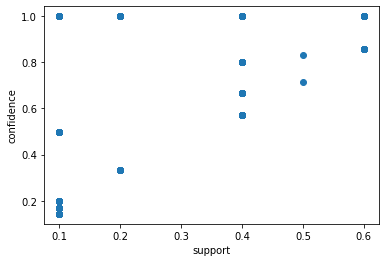

In [18]:
import matplotlib.pyplot as plt 
plt.scatter(x="support", y="confidence", data=rules)
plt.xlabel("support")
plt.ylabel("confidence")

<AxesSubplot:xlabel='support', ylabel='lift'>

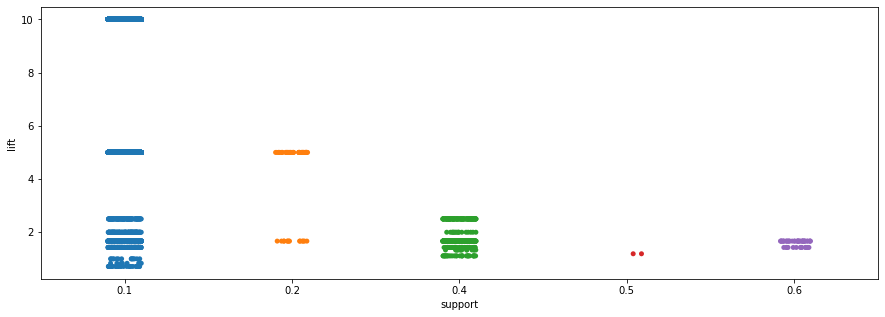

In [13]:
import seaborn as sns 
plt.figure(figsize=(15,5))
sns.stripplot(x="support", y="lift", data=rules)



In [ ]:
#Using 20% support and 60% confidence

In [20]:
itemsets2 = apriori(movies_data, min_support= 0.2 , use_colnames= True)
itemsets2 

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Sixth Sense, Patriot, Gladiator, V3_Sixth Sen..."
77,0.4,"(Sixth Sense, V1_Gladiator, Gladiator, V3_Sixt..."
78,0.4,"(Sixth Sense, Patriot, V1_Gladiator, V3_Sixth ..."
79,0.4,"(Patriot, V1_Gladiator, Gladiator, V3_Sixth Se..."


In [21]:
rules2 = association_rules(itemsets2, metric= 'lift',min_threshold=0.6)
rules2.sort_values('lift', ascending= False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V4_Green Mile),"(V1_Sixth Sense, Sixth Sense, Green Mile)",0.2,0.2,0.2,1.000000,5.000000,0.16,inf
176,"(V1_Sixth Sense, Green Mile)",(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
40,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
41,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
86,"(V1_Sixth Sense, Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
...,...,...,...,...,...,...,...,...,...
102,(Sixth Sense),"(V1_Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
46,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
212,(Sixth Sense),"(Gladiator, Patriot, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
232,"(V1_Gladiator, Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


Text(0, 0.5, 'confidence')

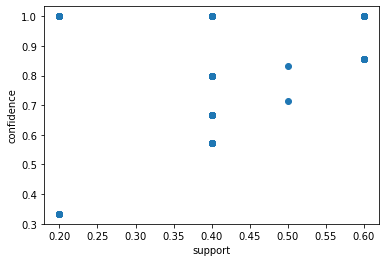

In [22]:
import matplotlib.pyplot as plt 
plt.scatter(x="support", y="confidence", data=rules2)
plt.xlabel("support")
plt.ylabel("confidence")

<AxesSubplot:xlabel='support', ylabel='lift'>

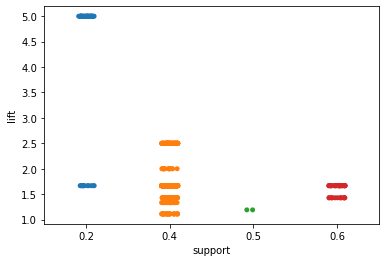

In [23]:
sns.stripplot(x="support", y="lift", data=rules2)

In [ ]:
#Using 5% support and 90% confidence

In [30]:
itemsets3 = apriori(movies_data, min_support= 0.05, use_colnames= True)
itemsets3 

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har..."
1393,0.1,"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har..."
1394,0.1,"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har..."
1395,0.1,"(V2_LOTR1, V1_Sixth Sense, V3_Harry Potter1, H..."


In [31]:
rules3 = association_rules(itemsets3, metric= 'lift', min_threshold=0.9)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
64211,(Green Mile),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64212,(LOTR2),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
64213,(V5_LOTR2),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64214,(LOTR1),"(V2_LOTR1, V1_Sixth Sense, Sixth Sense, V3_Har...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


Text(0, 0.5, 'confidence')

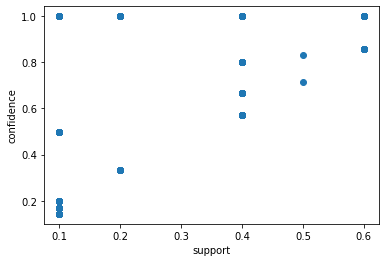

In [32]:
import matplotlib.pyplot as plt 
plt.scatter(x="support", y="confidence", data=rules3)
plt.xlabel("support")
plt.ylabel("confidence")

<AxesSubplot:xlabel='support', ylabel='lift'>

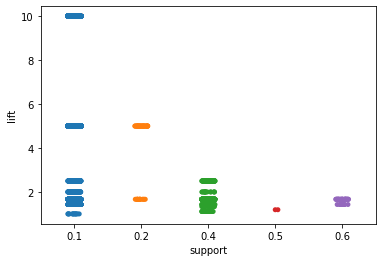

In [33]:
sns.stripplot(x="support", y="lift", data=rules3)